# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
# !git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
# !pip install -e .

C:\Users\CP1\Desktop\GLE-Billing\ultralytics


# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('Annotations/config.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Desktop\GLE-Billing


{'path': 'C:/Users\\=/CP1/Desktop/GLE-Billing/Annotations',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['Table']}

In [4]:
# Define number of classes based on YAML
with open('Annotations/config.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Desktop\GLE-Billing


# 3 Train YOLOv8

In [9]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='Annotations/config.yaml', epochs=1000, workers=1, imgsz=416)  # train the model

Ultralytics YOLOv8.2.62  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=Annotations/config.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

train: Scanning Annotations\obj_train_data... 390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 390/390 [00:00<00:00, 457.76it/s]


train: New cache created: Annotations\obj_train_data.cache


val: Scanning Annotations\obj_train_data... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 320.01it/s]

val: New cache created: Annotations\obj_train_data.cache


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 1 dataloader workers
Logging results to runs\detect\train6
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.86G      1.309      2.184      1.477         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.728       0.35      0.388     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.95G     0.5713     0.7031     0.9334         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.857        0.6      0.749      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.95G     0.5589     0.5987     0.9319         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20        0.6       0.45      0.377      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.96G     0.5722     0.5315     0.9235         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.163       0.55      0.165     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.95G     0.5438     0.4752     0.9064         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20       0.96        0.5      0.557      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.95G      0.529     0.4659     0.9071         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.982        0.5      0.525      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.95G     0.4877     0.4379     0.9088         14        416: 100%|██████████| 25/25 [00:34<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.961        0.5      0.624      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.95G     0.4746     0.4248     0.9065          9        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all         10         20      0.916        0.5      0.556       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.95G     0.4547     0.3953      0.895         15        416: 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all         10         20      0.951        0.5      0.562      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.95G     0.4645     0.3969      0.889         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.993        0.5      0.544      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.95G     0.4264     0.3775     0.8893         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.992        0.5      0.539      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.95G     0.4097     0.3592     0.8781         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.645      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.95G     0.4071     0.3618     0.8947         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.994        0.5      0.554      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.95G     0.4163     0.3534     0.8773         21        416: 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.838      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.95G     0.3933     0.3436      0.877         12        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all         10         20      0.994        0.5      0.554      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.95G      0.387     0.3486     0.8735         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.731      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.96G     0.3997     0.3477     0.8832         12        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.964       0.55      0.776      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.95G     0.3972     0.3399     0.8718         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.24it/s]

                   all         10         20          1      0.547       0.74      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.95G     0.3722     0.3199     0.8764         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10         20      0.993        0.5      0.695      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      1.96G     0.3698     0.3292     0.8711         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.95it/s]

                   all         10         20      0.995        0.5      0.654      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.95G     0.3703     0.3167     0.8757         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.554      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.96G     0.3647     0.3176     0.8723         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.751      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.95G     0.3488     0.3027     0.8601         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10         20      0.995        0.5      0.541      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.95G     0.3493     0.2935     0.8721         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.95G     0.3516     0.2932      0.873         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.609      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.96G     0.3426     0.2934     0.8633         26        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all         10         20          1        0.1       0.55      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.95G     0.3298     0.2898     0.8666         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.601      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.95G     0.3339     0.2866     0.8672         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.611      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.95G     0.3256      0.288     0.8734         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.84it/s]

                   all         10         20      0.995        0.5      0.737      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.95G     0.3213     0.2871     0.8582         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]

                   all         10         20          1      0.548      0.893      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.95G     0.3451     0.3012     0.8688         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.557      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.95G     0.3557     0.2943     0.8643         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.91it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.95G     0.3428     0.2953     0.8639         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.599      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.95G     0.3291     0.2895     0.8615         10        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         10         20      0.981        0.5      0.572      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.95G     0.3408     0.2935     0.8686         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         10         20      0.995        0.5      0.578      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.95G     0.3423     0.2892     0.8561         10        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.601      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.95G      0.328     0.2858     0.8536         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]

                   all         10         20      0.995        0.5      0.575      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.95G     0.3233     0.2801     0.8618         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.95G     0.3124     0.2769     0.8695         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.95G     0.3091     0.2736     0.8546         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.637      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.96G     0.3048     0.2612     0.8594         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.95G     0.3099     0.2735     0.8591         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.95G     0.3162     0.2755     0.8576         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.559      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.95G      0.326     0.2727     0.8571         24        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.849      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.95G     0.3049     0.2646      0.859         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.95G     0.2986      0.262      0.862         14        416: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.586      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.95G      0.292     0.2527     0.8602         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.548      0.868      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      1.95G     0.3034     0.2665     0.8558         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.671      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      1.95G     0.2968     0.2644     0.8523         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.667      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      1.95G     0.3023     0.2627     0.8511         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.96G     0.3009     0.2726     0.8633         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.785      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.95G     0.3031     0.2704     0.8595         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      1.96G     0.3202     0.2754     0.8605         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.994        0.5      0.623      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.95G     0.3067     0.2577     0.8485         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10         20      0.995        0.5      0.714      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      1.95G     0.2995     0.2602     0.8552         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.575      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      1.95G     0.2837     0.2457     0.8531         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.556      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.95G      0.317     0.2671     0.8662         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5       0.74      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.95G     0.3127     0.2673     0.8455         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all         10         20      0.995        0.5      0.633      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      1.95G     0.2964     0.2528     0.8447         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.95G     0.2877     0.2569     0.8511         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.572      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.95G     0.2928     0.2551     0.8515         12        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.651       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.95G      0.284     0.2616     0.8504         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10         20      0.992        0.5      0.582      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.96G     0.2776     0.2455     0.8514         23        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.611      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.96G     0.2906     0.2611     0.8603         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      1.95G     0.2836     0.2527     0.8442         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.606      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      1.95G     0.2837     0.2445     0.8514         13        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all         10         20      0.995        0.5        0.6      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      1.95G     0.2919     0.2511     0.8484         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.98it/s]

                   all         10         20      0.607       0.85      0.886       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      1.95G      0.281     0.2503      0.857         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1      0.548      0.766      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      1.95G     0.2762     0.2461     0.8552         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20       0.75       0.75      0.798      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      1.95G     0.2902     0.2459     0.8543         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      1.95G     0.2816     0.2499     0.8593         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      1.96G     0.2749     0.2481     0.8479         20        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.567      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      1.95G     0.2744     0.2423     0.8494         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.652      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      1.95G     0.2872     0.2521     0.8605         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.706      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      1.95G     0.2854     0.2505     0.8496         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.589      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      1.95G       0.27      0.233     0.8508         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         20      0.995        0.5      0.572      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      1.95G      0.274     0.2391     0.8553         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      1.95G     0.2716      0.243      0.854         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      1.95G     0.2741     0.2451     0.8524         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.637      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      1.95G     0.2698     0.2378     0.8583         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.976        0.5      0.583      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      1.95G     0.2766     0.2315     0.8472         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.987        0.5      0.606      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      1.95G      0.271     0.2349     0.8527         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         10         20      0.995        0.5      0.565      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      1.95G       0.28     0.2416     0.8529         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all         10         20      0.995        0.5      0.717      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      1.95G     0.2969     0.2524      0.854         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.682      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      1.95G     0.2893     0.2463     0.8452         21        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         10         20      0.667        0.2      0.412      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      1.95G     0.2881     0.2534     0.8493         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      1.96G      0.277     0.2382     0.8464         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10         20      0.917       0.55      0.752      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      1.95G     0.2821     0.2399     0.8593         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.611      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      1.95G     0.2799     0.2409     0.8458         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.765      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      1.95G     0.2707     0.2455     0.8534         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.611       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      1.95G     0.2667     0.2334     0.8571         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.619       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      1.96G     0.2874     0.2502     0.8489         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      1.95G     0.2752     0.2424     0.8535         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      1.96G     0.2701     0.2355     0.8461         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20       0.81       0.85       0.88      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      1.96G       0.27     0.2343     0.8475         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.547      0.794      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      1.95G     0.3065     0.2494     0.8517         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20          1       0.65      0.825      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      1.96G     0.2749     0.2382     0.8402         15        416: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.714       0.75      0.832       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      1.96G     0.2638     0.2269      0.849         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20        0.7        0.7      0.781      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      1.95G     0.2599     0.2316     0.8528         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5       0.68      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      1.95G       0.26     0.2295     0.8456         13        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10         20      0.995        0.5       0.66      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      1.95G      0.263     0.2281     0.8541         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.719      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      1.95G     0.2562     0.2297     0.8471         12        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         10         20      0.995        0.5      0.633      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      1.96G     0.2456     0.2135     0.8457         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.995        0.5      0.724      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      1.95G     0.2505     0.2219     0.8496         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.632      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      1.95G     0.2523     0.2206     0.8461         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.629      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      1.95G     0.2614     0.2249     0.8549         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.995        0.5      0.797      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      1.96G     0.2733     0.2265     0.8569         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         10         20     0.0476       0.05     0.0259    0.00517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      1.95G     0.2639     0.2281     0.8577         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.616      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      1.95G     0.2782     0.2302     0.8473         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10         20      0.991        0.5      0.616      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      1.95G     0.2871     0.2479     0.8519         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.638      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      1.95G     0.2522     0.2154      0.848         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      1.95G     0.2566     0.2239     0.8347         20        416: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      1.95G     0.2678     0.2266     0.8414         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      1.95G     0.2623     0.2299     0.8479         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.589      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      1.95G      0.257     0.2316     0.8426         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.567       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      1.95G     0.2511     0.2264     0.8427         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      1.95G     0.2671      0.229      0.856         22        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.656      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      1.95G     0.2573     0.2266     0.8458         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.641      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      1.96G     0.2468     0.2145     0.8451         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.619      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      1.95G     0.2533     0.2226      0.845         21        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.92it/s]

                   all         10         20      0.995        0.5      0.601      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      1.95G     0.2581       0.22     0.8472         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.615      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      1.95G     0.2485     0.2208     0.8503         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20       0.85       0.85      0.872      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      1.95G      0.251     0.2188     0.8558         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.606      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      1.96G     0.2722     0.2304     0.8516         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.665      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      1.96G     0.2587     0.2355     0.8454         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      1.96G     0.2503     0.2251      0.846         20        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10         20      0.995        0.5      0.604       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      1.95G      0.255     0.2193     0.8522         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.611      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      1.95G     0.2455     0.2187     0.8395         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.952        0.5      0.572      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      1.95G     0.2479     0.2175     0.8399         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      1.95G     0.2439     0.2172     0.8408         23        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      1.95G     0.2551      0.218     0.8501         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      1.95G     0.2636     0.2263     0.8445         24        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      1.95G     0.2525     0.2223     0.8507         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      1.95G     0.2417     0.2079     0.8447         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.714        0.5      0.677      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      1.95G     0.2517     0.2169     0.8505         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5       0.63      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      1.95G     0.2631     0.2254     0.8525         20        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.631      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      1.96G     0.2845     0.2386     0.8566         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      1.95G     0.2636     0.2399     0.8509         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.606      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      1.95G     0.2567     0.2286     0.8542         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      1.95G     0.2563       0.22     0.8545         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      1.95G      0.257     0.2206     0.8448         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      1.95G       0.26     0.2192     0.8504         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      1.95G     0.2528     0.2133     0.8479         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all         10         20      0.995        0.5      0.629      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      1.95G     0.2489     0.2106     0.8467         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.605      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      1.95G     0.2363     0.2064     0.8465         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.575      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      1.95G     0.2461     0.2091     0.8503         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.715      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      1.96G     0.2565     0.2187     0.8475         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.652       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      1.96G     0.2367     0.2087     0.8397         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all         10         20          1      0.547      0.758      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      1.95G     0.2523     0.2144     0.8503         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.994        0.5      0.647      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      1.95G     0.2621     0.2247     0.8508         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.629        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      1.95G     0.2496      0.212     0.8446         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.994        0.5      0.606      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      1.95G     0.2558     0.2164      0.843         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.993        0.5      0.596      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      1.95G     0.2421     0.2125     0.8395         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         10         20      0.995        0.5      0.567      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      1.95G     0.2409     0.2079     0.8426         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5       0.61      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      1.95G     0.2392     0.2061     0.8442         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.675      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      1.96G     0.2324     0.2143     0.8423         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         10         20      0.995        0.5      0.673      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      1.95G     0.2508     0.2056     0.8513         24        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10         20      0.995        0.5      0.723      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      1.95G     0.2472     0.2098     0.8492         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      1.95G     0.2371     0.2104     0.8449         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      1.95G     0.2408     0.2015     0.8529         12        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      1.95G     0.2464     0.2071     0.8377         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.641      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      1.95G     0.2333     0.2012     0.8515         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.995        0.5      0.638      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      1.95G      0.241     0.2035     0.8389         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.625      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      1.95G     0.2334     0.2047     0.8458         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.566      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      1.95G     0.2465      0.216     0.8482         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all         10         20      0.995        0.5      0.661      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      1.95G      0.239     0.2053     0.8441         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      1.95G      0.249     0.2131     0.8441         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.57      0.776       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      1.95G     0.2557     0.2165     0.8399         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.548      0.755      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      1.95G     0.2459     0.2159     0.8406         23        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.666      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      1.95G     0.2441     0.2109     0.8512         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.699       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      1.96G     0.2351     0.2054       0.84         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.824        0.7      0.823      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      1.95G     0.2281     0.1925     0.8376         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.6        0.8       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      1.95G     0.2276     0.1996     0.8436         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1       0.55      0.775      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      1.95G     0.2348     0.2034     0.8411         22        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      1.95G     0.2372     0.1982     0.8444         20        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      1.95G     0.2291     0.1999     0.8391         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.88it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      1.95G     0.2442      0.207     0.8441         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      1.95G     0.2307     0.1985     0.8485         22        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      1.95G     0.2324     0.2001     0.8476         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.651       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      1.95G     0.2303      0.197     0.8486         20        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.731      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      1.96G     0.2359     0.2152     0.8549         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.639      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      1.95G     0.2422     0.2067     0.8468         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      1.95G     0.2387     0.2105      0.843         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.548      0.708      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      1.95G     0.2523     0.2091      0.852         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.995        0.5       0.64      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      1.95G      0.238     0.2047     0.8464         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all         10         20          1      0.548      0.685      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      1.95G      0.234     0.2076     0.8508         21        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.655      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      1.95G     0.2321     0.1983     0.8494         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      1.95G     0.2259      0.194     0.8482         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      1.95G     0.2265     0.1982     0.8493         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      1.95G     0.2354     0.1992     0.8435         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5       0.69      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      1.95G      0.237     0.2018      0.848         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.698      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      1.95G     0.2259     0.1984     0.8468         27        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      1.95G     0.2259     0.1983     0.8394         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.651      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      1.96G     0.2374     0.2027       0.84         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.444        0.4      0.336      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      1.95G     0.2348     0.1995     0.8438         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      1.95G      0.219      0.192     0.8401         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      1.95G     0.2268     0.1909     0.8468         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      1.95G      0.227     0.1989     0.8311         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all         10         20          1      0.547      0.714      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      1.95G     0.2359     0.2091     0.8432         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      1.96G     0.2268      0.204     0.8422         26        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      1.95G     0.2318     0.2084     0.8447         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      1.95G      0.231     0.2002     0.8374         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.915      0.538      0.664      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      1.95G     0.2297     0.1984     0.8405         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      1.95G     0.2245     0.2006     0.8434         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.547      0.756      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      1.95G     0.2224     0.1899     0.8405         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.547      0.736      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      1.95G     0.2329     0.2027     0.8438         10        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.857        0.6      0.759      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      1.95G     0.2326     0.1997     0.8456         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.672      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      1.95G     0.2346     0.2014     0.8413         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.665      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      1.96G     0.2368     0.2062     0.8469         26        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5       0.67      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      1.95G     0.2341     0.1993     0.8491         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.704       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      1.96G     0.2213     0.1917     0.8394         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10         20      0.995        0.5       0.66      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      1.95G     0.2285     0.1986     0.8505         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20          1      0.547      0.726      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      1.95G     0.2297     0.1994     0.8403         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      1.95G     0.2331     0.2005     0.8447         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      1.95G     0.2158     0.1926     0.8475         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      1.95G     0.2144     0.1895     0.8381         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      1.95G     0.2212     0.1929     0.8445         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      1.95G     0.2136     0.1854     0.8446         21        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      1.95G     0.2215     0.1915     0.8474         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      1.95G     0.2251     0.1871     0.8366         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      1.96G      0.221     0.1934     0.8441         12        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      1.95G     0.2276     0.1978      0.847         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      1.95G     0.2315      0.201     0.8512         10        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.637      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      1.95G     0.2223     0.1982     0.8398         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      1.95G     0.2094     0.1834     0.8389         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      1.95G     0.2244     0.1961     0.8368         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      1.96G     0.2325     0.2032     0.8466         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      1.95G     0.2328     0.2017     0.8518         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      1.96G     0.2205     0.1953      0.836         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      1.95G     0.2131     0.1839     0.8402         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      1.95G     0.2182     0.1786     0.8346         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.665      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      1.96G     0.2152     0.1891     0.8392         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.994        0.5       0.65      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      1.95G     0.2261     0.1921     0.8441         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      1.95G     0.2259      0.193      0.837         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.727      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      1.96G     0.2309     0.2004     0.8415         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all         10         20      0.995        0.5      0.597       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      1.95G     0.2225     0.1941     0.8379         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      1.95G      0.227     0.1959     0.8375         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      1.96G     0.2221     0.1866     0.8402         21        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.956       0.55       0.79      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      1.95G     0.2181     0.1867     0.8353         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.677      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      1.96G     0.2237       0.19     0.8422         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      1.95G     0.2156      0.187     0.8459         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.55      0.775      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      1.95G     0.2086     0.1749     0.8326         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      1.95G     0.2077     0.1742      0.839         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         10         20          1       0.55      0.775      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      1.95G     0.2154     0.1876     0.8416         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      1.95G     0.2212     0.1958     0.8449         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all         10         20          1       0.55      0.775      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      1.95G     0.2324     0.1995     0.8462         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.735      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      1.96G     0.2256     0.1937     0.8387         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      1.95G     0.2222     0.1983     0.8409         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.994        0.5      0.631      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      1.95G     0.2151       0.18     0.8393         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.994        0.5      0.629      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      1.95G       0.21     0.1774     0.8427         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      1.96G     0.2248     0.1881     0.8469         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      1.96G     0.2086     0.1815     0.8455         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      1.95G     0.2104     0.1748     0.8324         25        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.923        0.6      0.784      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      1.95G     0.2154     0.1867     0.8432         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.917       0.55      0.752      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      1.96G     0.2195     0.1884     0.8412         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.548      0.726      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      1.95G     0.2155     0.1831     0.8486         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      1.95G     0.2278     0.1883     0.8397         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      1.95G     0.2325     0.2007     0.8402         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      1.95G     0.2185     0.1919     0.8472         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10         20      0.995        0.5      0.636      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      1.95G      0.219     0.1898     0.8443         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.547      0.756      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      1.95G     0.2128     0.1884     0.8398         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      1.95G      0.213     0.1858     0.8391         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.915       0.54      0.709      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      1.95G     0.2148     0.1868     0.8371         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      1.95G     0.2028     0.1786     0.8417         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      1.96G     0.2243      0.195     0.8447         21        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      1.95G     0.2206     0.1914     0.8416         10        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.56      0.732      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      1.95G     0.2114     0.1906     0.8531         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.644       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      1.95G      0.217     0.1808     0.8437         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         10         20      0.995        0.5       0.58       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      1.95G      0.213     0.1858      0.835         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10         20      0.995        0.5      0.642      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      1.95G     0.2154     0.1892     0.8335         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.654      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      1.95G     0.2186     0.1848     0.8379         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.622      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      1.95G     0.2108      0.184     0.8325         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.548      0.669      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      1.95G     0.2044     0.1776     0.8405         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      1.95G     0.2192     0.1901     0.8409         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      1.95G     0.2187     0.1877     0.8371         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.756      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      1.95G     0.2143     0.1952     0.8406         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1      0.547      0.678      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      1.95G      0.215     0.1894     0.8359         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all         10         20          1       0.05      0.525      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      1.95G       0.23     0.1962      0.839         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.15      0.575      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      1.95G     0.2163     0.1866     0.8432         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1       0.55      0.768      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      1.95G     0.2122     0.1828      0.843         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10         20      0.864      0.637      0.785      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      1.95G      0.211     0.1817     0.8432         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.915      0.538      0.722      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      1.95G     0.2087     0.1841     0.8356         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.549      0.772      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      1.96G     0.2222     0.1913     0.8393         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.548      0.756      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      1.95G      0.211     0.1798     0.8338         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      1.96G     0.2154     0.1827     0.8398         21        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         10         20      0.994        0.5      0.619      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      1.96G      0.211     0.1764     0.8348         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.679      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      1.95G     0.2137     0.1811     0.8372         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.765       0.65      0.762      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      1.95G      0.227     0.1954      0.842         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all         10         20          1      0.562       0.74      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      1.95G     0.2044     0.1806     0.8382         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.699      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      1.95G     0.2072     0.1801     0.8457         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.722      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      1.95G     0.2013     0.1763     0.8406         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.616      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      1.95G     0.2105     0.1765     0.8388         10        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      1.96G     0.2016     0.1783     0.8339         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      1.95G      0.206     0.1794     0.8403         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.994        0.5      0.687      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      1.95G     0.2113      0.184     0.8403         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.993        0.5      0.636      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      1.95G      0.204     0.1719     0.8431         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      1.95G     0.2064     0.1759     0.8373         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      1.95G     0.1993     0.1768     0.8403         20        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      1.95G     0.2006     0.1719     0.8456         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all         10         20          1      0.547      0.722      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      1.95G     0.1998      0.171      0.837         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      1.95G     0.2077     0.1877     0.8303         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      1.95G     0.2174     0.1861      0.844         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      1.95G     0.2083     0.1836     0.8474         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.668      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      1.95G     0.2103     0.1842     0.8426         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.741      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      1.96G     0.2119     0.1876     0.8501         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      1.95G     0.2068     0.1841     0.8372         17        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      1.95G       0.21     0.1831     0.8388         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.547      0.714      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      1.95G     0.1957     0.1666     0.8443         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.637      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      1.95G     0.1972     0.1731     0.8363         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      1.96G     0.1962     0.1678     0.8439         24        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000      1.95G     0.2019     0.1718     0.8424         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      1.95G     0.2012     0.1685     0.8343         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      1.95G     0.2044     0.1726     0.8331         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      1.95G     0.2118     0.1798     0.8403         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      1.95G      0.203     0.1707     0.8384         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      1.96G     0.2134     0.1818     0.8353         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      1.95G     0.2045     0.1785     0.8434         22        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.756      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      1.96G     0.2018     0.1789     0.8324         26        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.698      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      1.95G     0.1988     0.1752      0.827         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.658      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      1.95G     0.2052     0.1761     0.8475         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1       0.65      0.825      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      1.95G      0.203     0.1799     0.8408         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.548      0.733       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      1.95G     0.1946     0.1702     0.8348         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.629      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      1.95G     0.2113     0.1789     0.8457         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      1.96G      0.212     0.1783     0.8454         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      1.95G     0.2014     0.1646     0.8433         20        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      1.95G     0.2077     0.1789     0.8376         20        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      1.95G     0.2213     0.1879     0.8423         11        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      1.95G     0.2129     0.1851      0.854         15        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      1.95G     0.2084     0.1765     0.8377         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.572      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      1.95G     0.2089     0.1823     0.8483         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.611      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      1.95G     0.2125     0.1781     0.8375         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.665      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      1.96G     0.2062     0.1811     0.8373         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      1.95G     0.2038     0.1835     0.8392         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.677      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      1.95G     0.2052     0.1708     0.8408         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      1.95G     0.1992     0.1688     0.8393         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      1.95G     0.2043     0.1703     0.8376         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      1.95G     0.2071     0.1766     0.8438         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      1.95G     0.2029     0.1771     0.8349         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      1.96G     0.2061     0.1801     0.8406         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10         20      0.995        0.5      0.677       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      1.95G     0.2055     0.1808     0.8432         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      1.95G     0.2223     0.1871     0.8511         10        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.732      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      1.95G     0.2063     0.1832     0.8388         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.812       0.65      0.765      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      1.95G     0.2135      0.175     0.8477         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.917       0.55      0.752      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      1.95G     0.2028     0.1693     0.8374         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      1.95G     0.1944     0.1745     0.8429         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      1.95G     0.1994     0.1755     0.8373         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      1.95G     0.2062     0.1766      0.847         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      1.95G     0.2011     0.1721     0.8427         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.726      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      1.96G     0.1892     0.1683     0.8282         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1      0.548      0.771       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      1.95G     0.1997     0.1681     0.8297         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      1.95G     0.2157     0.1814     0.8436         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.6        0.8      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      1.95G      0.207     0.1693     0.8429         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all         10         20          1        0.5       0.75      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      1.95G     0.2043     0.1735     0.8387         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all         10         20          1      0.547      0.756      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      1.95G      0.202     0.1714     0.8326         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20          1      0.547      0.756      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      1.95G     0.2032     0.1728     0.8437         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1      0.547      0.756      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      1.95G      0.208     0.1756     0.8376         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      1.95G     0.2104     0.1782     0.8397         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      1.95G     0.2005     0.1716     0.8422         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      1.95G     0.2069     0.1751     0.8429         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      1.95G     0.2071      0.176     0.8379         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      1.95G     0.1977      0.166     0.8412         27        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      1.96G     0.2049     0.1731     0.8449         23        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      1.95G     0.2019     0.1672     0.8358         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      1.95G     0.1996     0.1684     0.8351         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]

                   all         10         20      0.917       0.55      0.752       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      1.95G     0.2013     0.1743     0.8405         13        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.923        0.6      0.784      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      1.95G     0.2014      0.166     0.8382         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      1.95G     0.2055     0.1705     0.8491         12        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      1.95G      0.198     0.1729      0.835         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      1.95G     0.1956     0.1643     0.8422         12        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000      1.95G     0.2081      0.174     0.8393         21        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all         10         20      0.994        0.5      0.637      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      1.95G     0.1963     0.1685     0.8443         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      1.95G     0.1999     0.1681     0.8416         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      1.95G     0.1952     0.1679      0.834         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      1.95G     0.1884      0.166     0.8387         17        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.622      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      1.95G     0.1949     0.1656     0.8408         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.645      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      1.95G     0.1965     0.1713     0.8402         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      1.96G     0.1862     0.1639     0.8309         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      1.96G     0.2038      0.174     0.8384         24        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      1.96G     0.1893     0.1662     0.8401         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.654      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      1.95G     0.1879     0.1578     0.8431         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.714       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      1.95G     0.2053     0.1717     0.8505         14        416: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      1.95G     0.1935     0.1646     0.8483         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      1.95G     0.2015      0.171     0.8442         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000      1.95G     0.1937     0.1651     0.8288         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         20      0.995        0.5      0.715      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      1.95G     0.1978     0.1689      0.836         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.917       0.55      0.752      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      1.95G     0.1994     0.1704     0.8358         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   387/1000      1.95G     0.2022     0.1715     0.8515         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   388/1000      1.95G     0.2033     0.1674     0.8439         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   389/1000      1.96G     0.2024      0.168     0.8373         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   390/1000      1.95G     0.1996     0.1721     0.8373         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.6        0.8       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   391/1000      1.95G     0.1999      0.174     0.8343         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   392/1000      1.96G     0.1935     0.1617     0.8383         24        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   393/1000      1.95G     0.1949     0.1641     0.8341         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   394/1000      1.95G     0.1899     0.1597     0.8463         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   395/1000      1.95G     0.1893     0.1606     0.8371         27        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   396/1000      1.95G     0.1913     0.1621     0.8434         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547       0.74      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   397/1000      1.95G     0.1887     0.1577     0.8365         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.495      0.727      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   398/1000      1.95G     0.1876     0.1583     0.8403         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   399/1000      1.96G     0.1804     0.1567     0.8396         26        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   400/1000      1.95G     0.1962     0.1689     0.8424         13        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   401/1000      1.95G     0.1879      0.156     0.8381         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   402/1000      1.95G     0.1885     0.1629     0.8417         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   403/1000      1.95G     0.1863     0.1603     0.8361         11        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   404/1000      1.95G     0.2011      0.166     0.8351         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   405/1000      1.95G     0.2026     0.1723     0.8357         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   406/1000      1.95G     0.1973     0.1665     0.8315         11        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   407/1000      1.95G     0.1968     0.1639     0.8308         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   408/1000      1.96G      0.195     0.1688     0.8416         29        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   409/1000      1.95G     0.2007     0.1634     0.8421         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   410/1000      1.95G      0.192     0.1598     0.8334         20        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.707      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   411/1000      1.95G     0.1951     0.1642     0.8427         18        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   412/1000      1.95G     0.1898     0.1664     0.8362         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   413/1000      1.96G     0.1903     0.1687     0.8402         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   414/1000      1.95G     0.1954     0.1764     0.8423         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.917       0.55      0.752      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   415/1000      1.95G     0.1901     0.1618     0.8323         16        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.709      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   416/1000      1.95G     0.1854     0.1594     0.8397         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.724      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   417/1000      1.95G     0.1906     0.1556     0.8339         16        416: 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.995        0.5      0.717      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   418/1000      1.95G     0.1907      0.167     0.8367         19        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.672      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   419/1000      1.95G     0.1877     0.1579     0.8418         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.735      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   420/1000      1.95G     0.1869     0.1578     0.8312         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.917       0.55      0.752       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   421/1000      1.96G      0.184     0.1653     0.8363         21        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   422/1000      1.95G     0.1835     0.1593     0.8428         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.665      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   423/1000      1.96G     0.1929     0.1619     0.8385         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all         10         20      0.995        0.5      0.691      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   424/1000      1.95G     0.1998     0.1682     0.8452         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   425/1000      1.95G     0.1898     0.1583     0.8399         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   426/1000      1.95G     0.1975     0.1616     0.8312         15        416: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1      0.547      0.756      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   427/1000      1.95G     0.1915     0.1611     0.8347         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   428/1000      1.95G     0.1911     0.1569     0.8279         15        416: 100%|██████████| 25/25 [00:34<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   429/1000      1.95G     0.1935     0.1619     0.8408         21        416: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.01it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   430/1000      1.95G     0.1954     0.1641     0.8324         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   431/1000      1.96G     0.1954     0.1617     0.8375         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   432/1000      1.95G     0.2004     0.1622     0.8472         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   433/1000      1.96G     0.1931     0.1671     0.8385         13        416: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   434/1000      1.96G     0.1853     0.1577     0.8324         19        416: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1       0.55      0.775      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   435/1000      1.96G     0.1844     0.1635      0.833         18        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   436/1000      1.95G     0.1991     0.1623     0.8451         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   437/1000      1.95G      0.196     0.1637     0.8313         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20      0.917       0.55      0.752      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   438/1000      1.95G     0.1874     0.1619     0.8428         22        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   439/1000      1.95G     0.1839      0.157     0.8435         24        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all         10         20      0.995        0.5      0.727      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   440/1000      1.95G      0.192     0.1748     0.8487         14        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   441/1000      1.95G     0.1918     0.1633     0.8359         19        416: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   442/1000      1.95G     0.1863     0.1616     0.8348         20        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   443/1000      1.95G     0.1838     0.1587     0.8398         17        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1       0.55      0.775      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   444/1000      1.95G     0.1893      0.164      0.845         13        416: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   445/1000      1.95G     0.1875     0.1564     0.8294         14        416: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   446/1000      1.96G     0.1972     0.1683     0.8275         16        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   447/1000      1.95G     0.1894     0.1628     0.8448         25        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   448/1000      1.95G     0.2013     0.1711     0.8378         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   449/1000      1.95G      0.198     0.1695     0.8385         15        416: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   450/1000      1.95G     0.1959      0.165     0.8362         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10         20          1        0.5       0.75       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   451/1000      1.95G      0.185     0.1566     0.8301         18        416: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10         20          1        0.5       0.75       0.75
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 351, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



451 epochs completed in 4.177 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 22.5MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics YOLOv8.2.62  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


                   all         10         20          1        0.6        0.8      0.749
Speed: 1.6ms preprocess, 3.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train6


# 4 Evaluate the model

In [10]:
results.results_dict

{'metrics/precision(B)': 1.0,
 'metrics/recall(B)': 0.6,
 'metrics/mAP50(B)': 0.8,
 'metrics/mAP50-95(B)': 0.7493333333333332,
 'fitness': 0.7544}

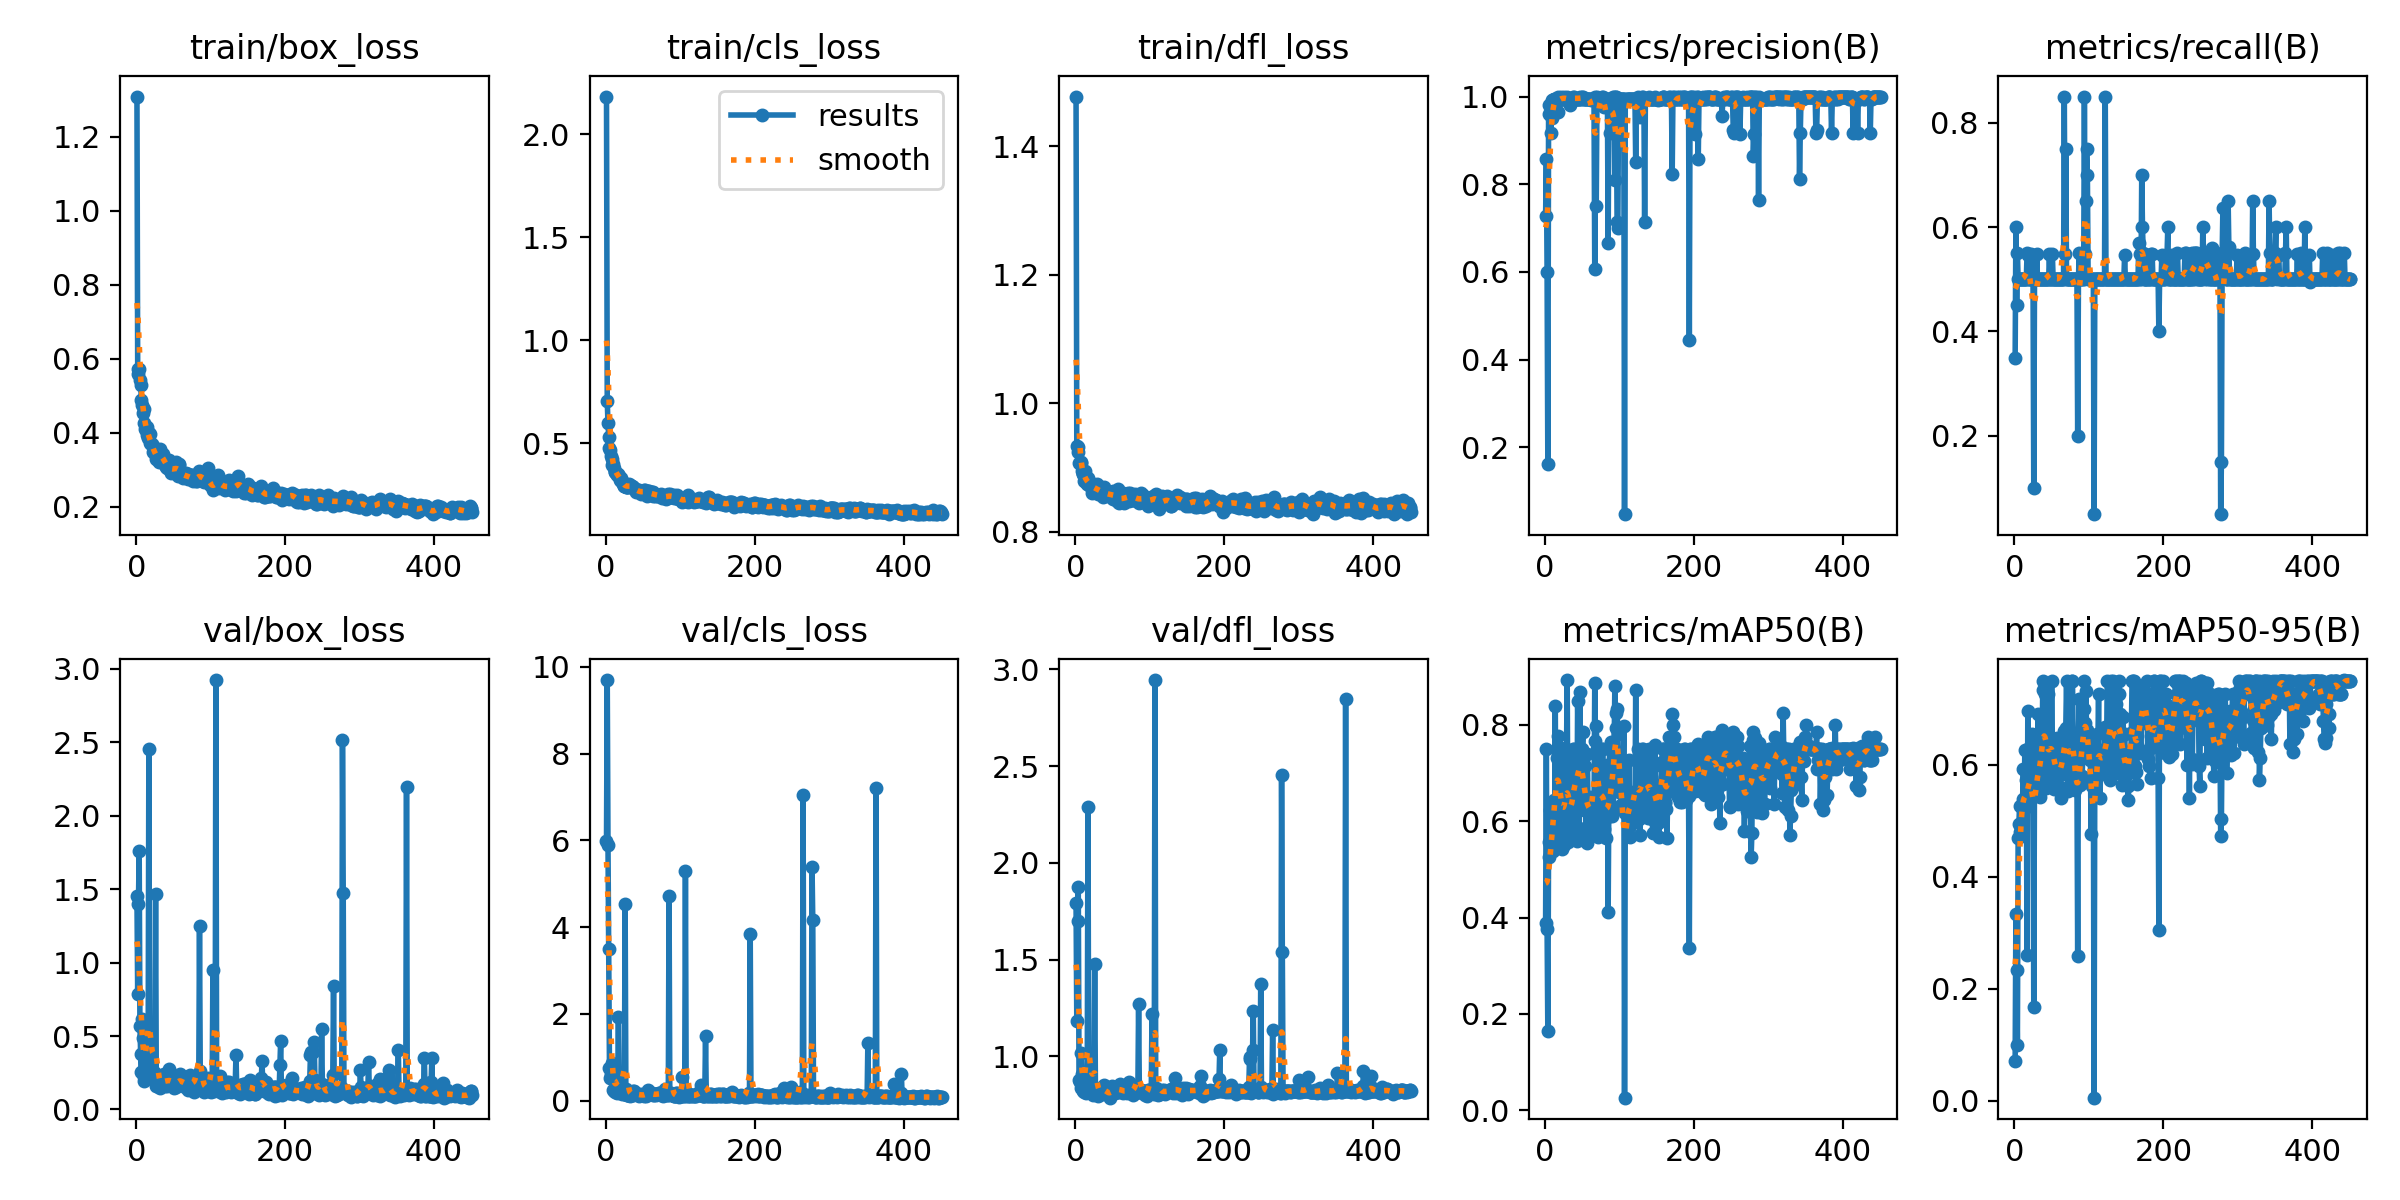

In [11]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

## 4.1 Visualize the Training Data

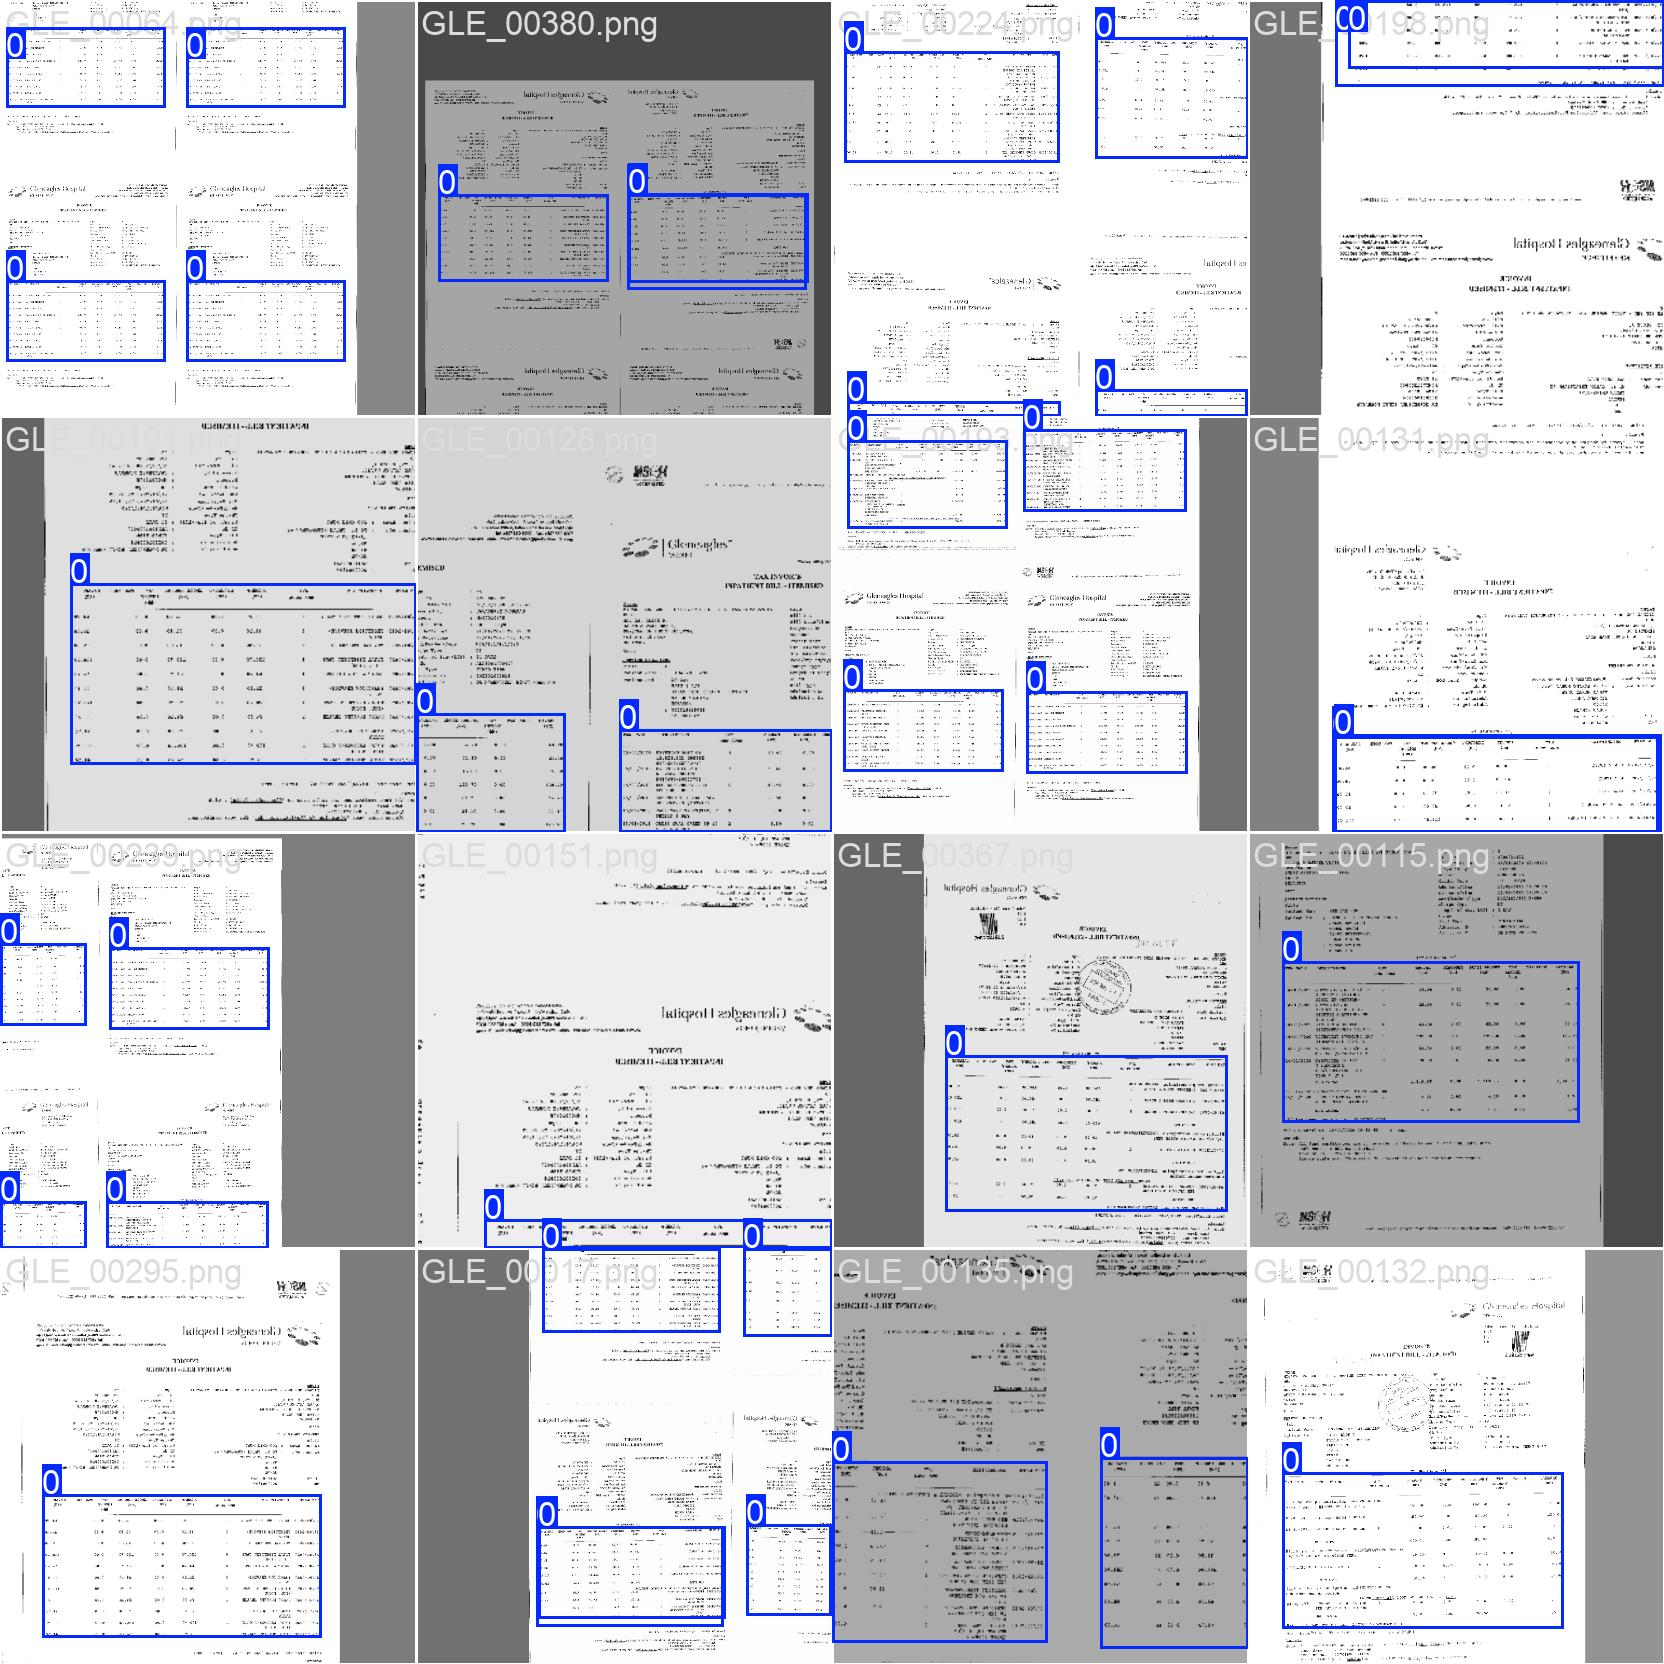

In [12]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

## 4.2 Visualize the Labels of Validating Data

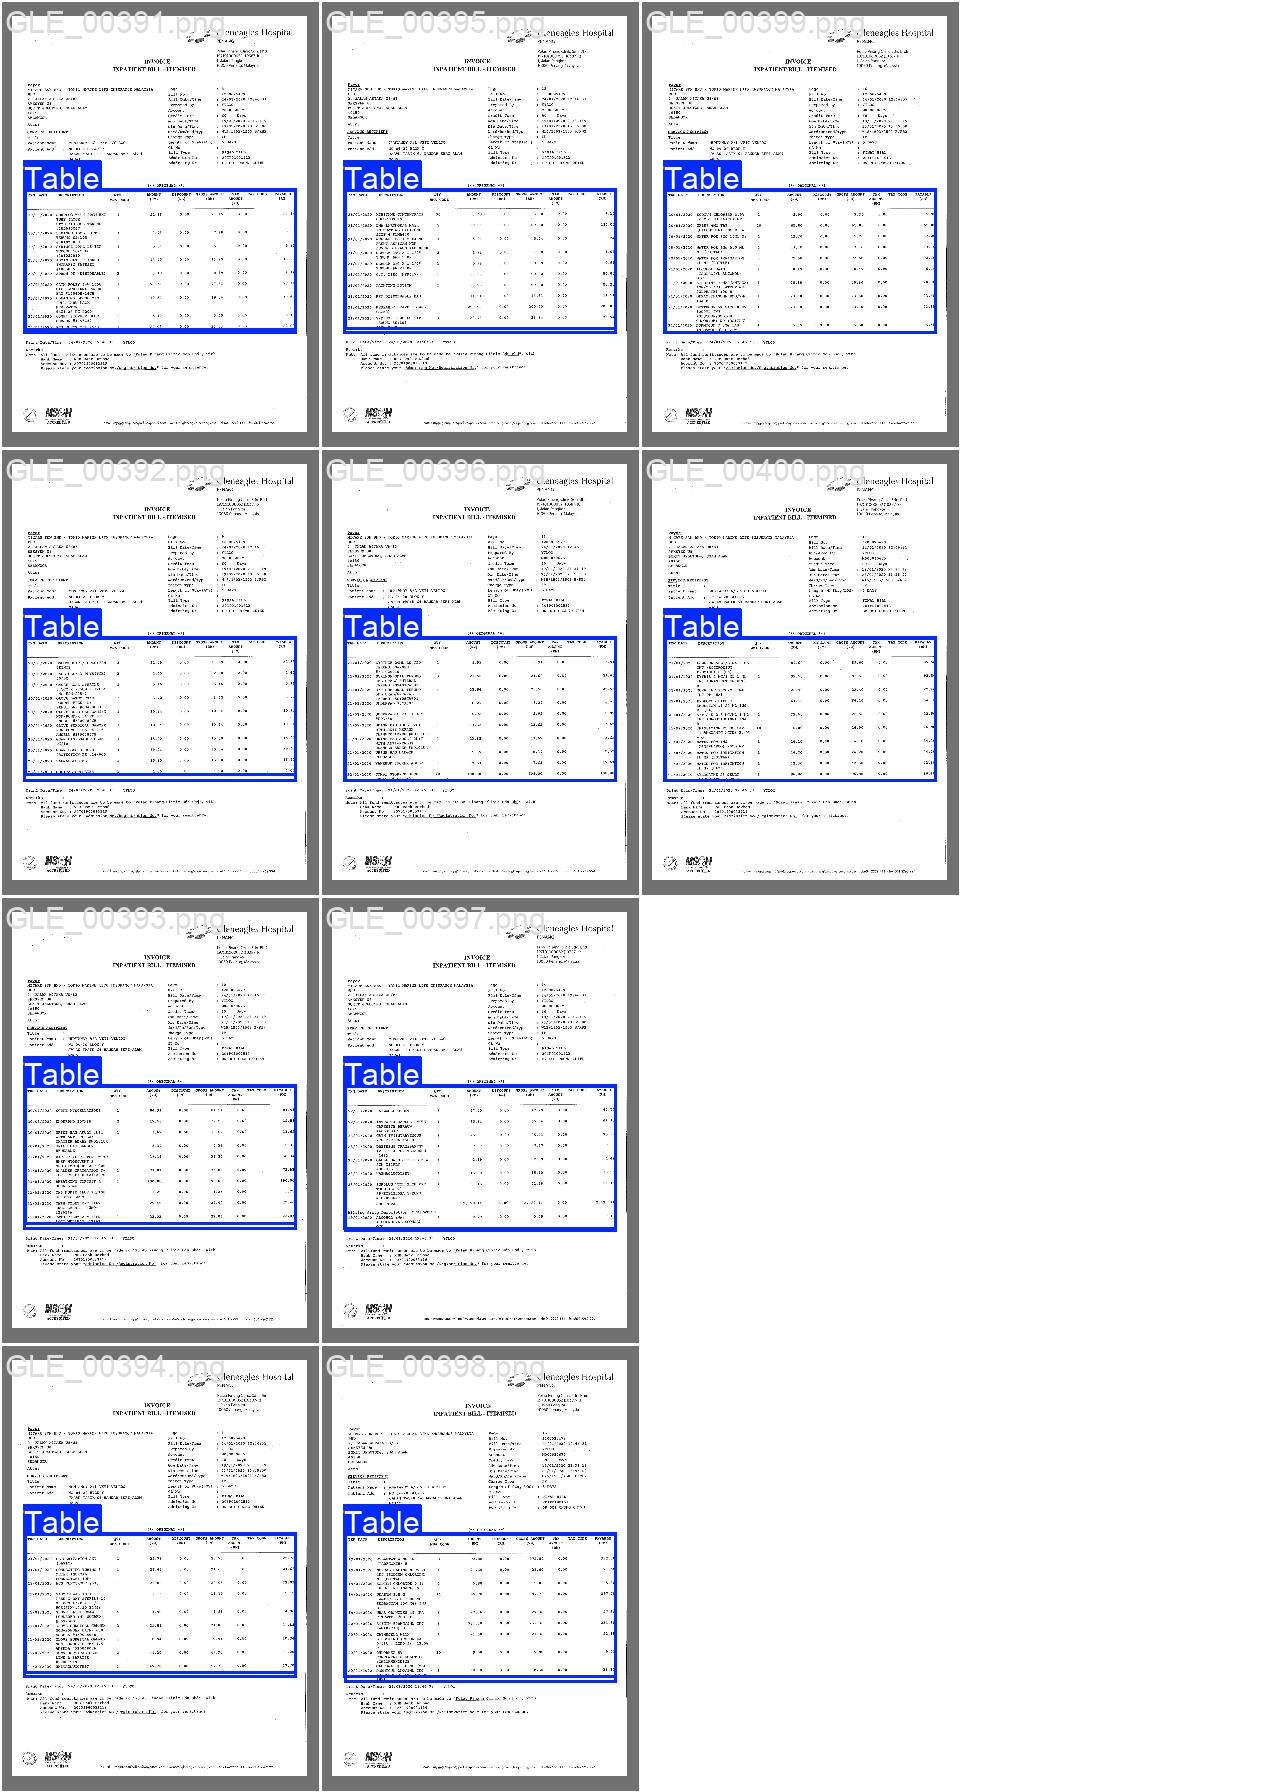

In [13]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

## 4.3 Visualize the Predicted Testing Data

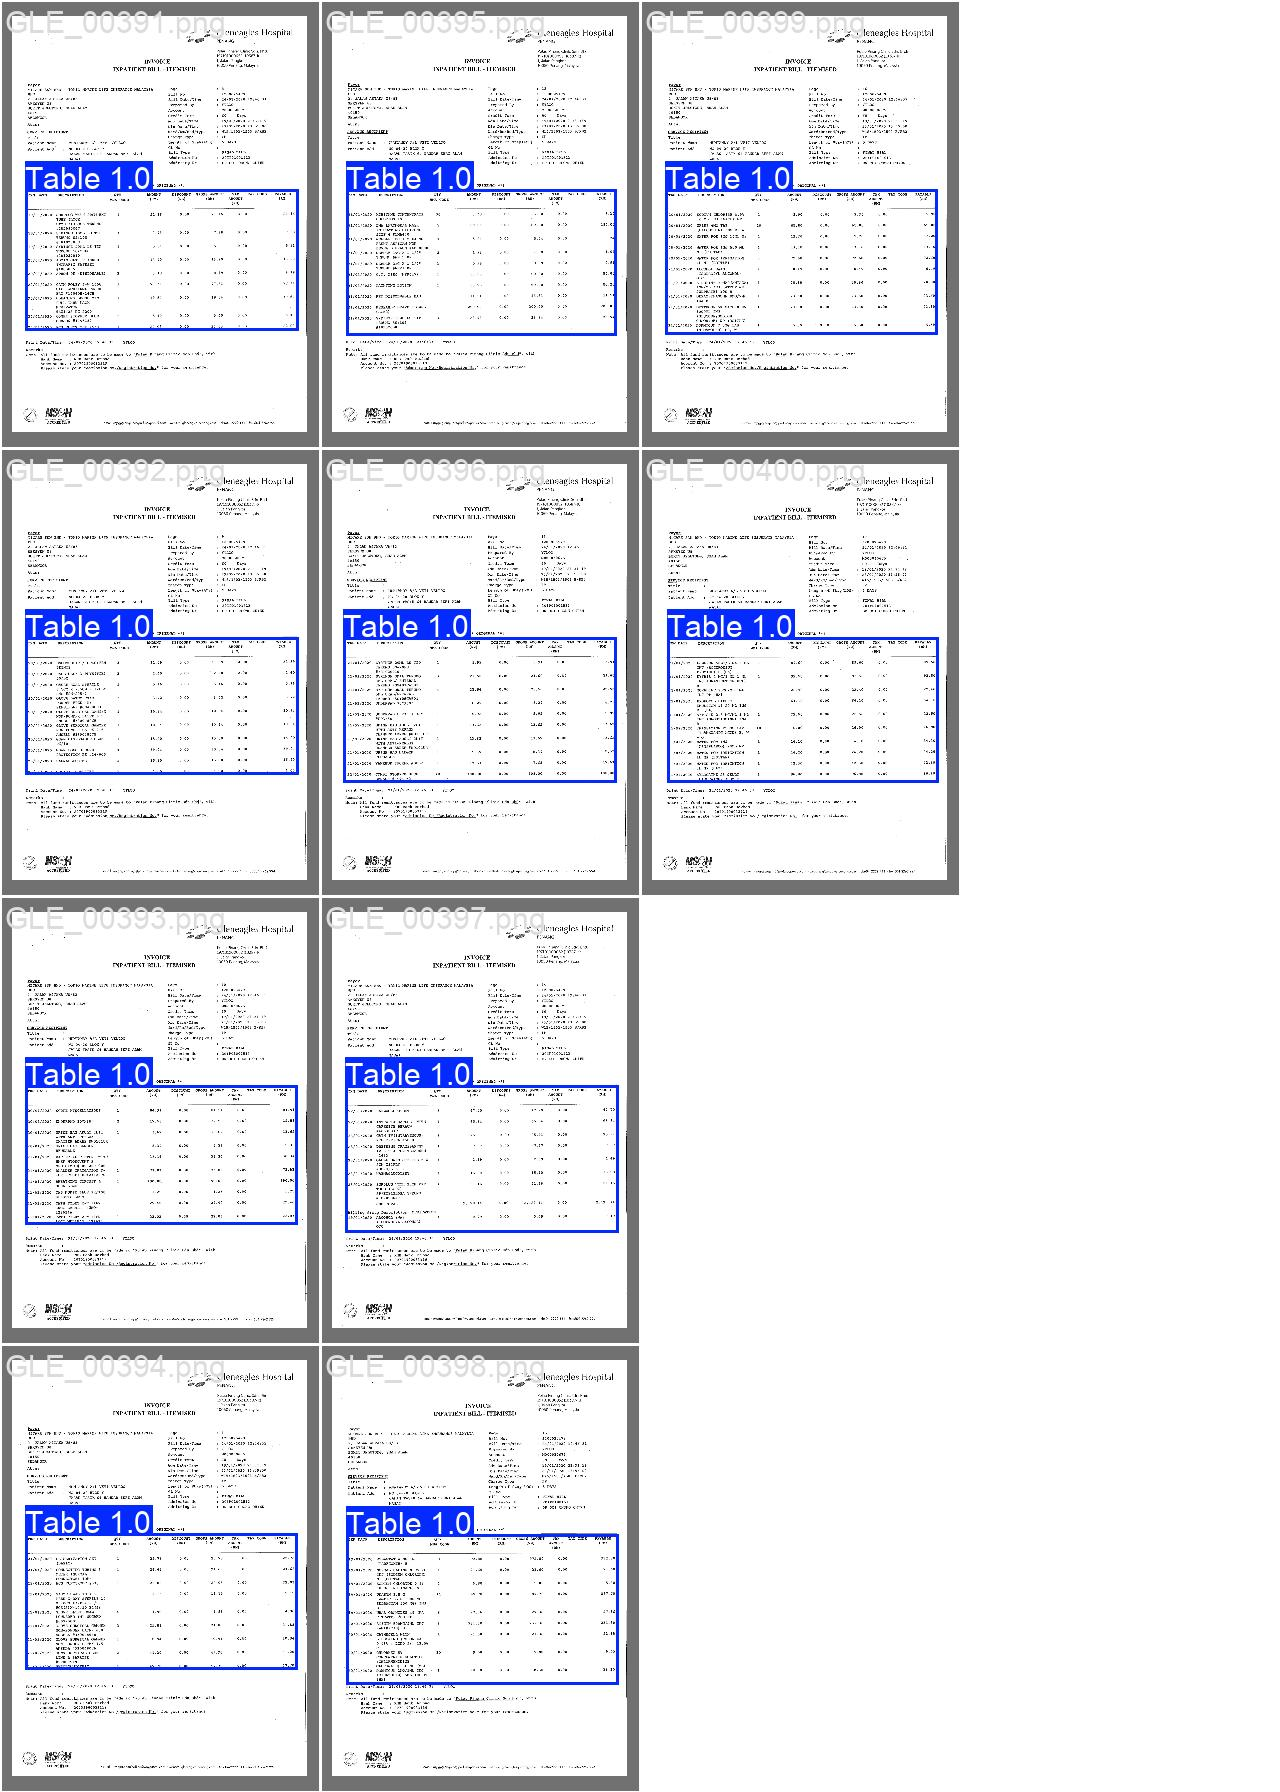

In [14]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [22]:
source = 'data/GLE_test'
model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
# model = YOLO(f'runs/detect/train/weights/best.pt')

# model = YOLO('best.pt')

# deskewer = DataAugmentation.Deskew(source)
# deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416, iou=0.25, conf=0.9)

OSError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [16]:
print(results.save_dir)

runs\detect\train6
